## **1. Primera	Parte	(5	puntos)**

El	alumno	puede	emplear	libremente	cualquier	base	de	datos	de	reconocimiento	de	imágenes	como	“MNIST”,	“FASHION	MNIST”	“Breast	Histopathology	Images	Dataset” etc.	Sobre	dicha	base	de	datos	el	alumno	debe	implementar	una	red	convolutiva	para la	clasificación	de	las imágenes	empleando	la	librería	keras.

In [ ]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, models
from keras.datasets import mnist    # Base de datos MNIST
from keras.utils import to_categorical
import tensorflow as tf

In [ ]:
print(mnist)

<module 'keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/datasets/mnist/__init__.py'>


1. Explicar	brevemente	el	problema (1	punto)

El problema es que necesitamos clasificar imágenes de forma automática y con alta fiabilidad. Esto no se puede lograr con programación convencional ya que tenemos que leer los píxeles de las imágenes y estas pueden estar movidas, rotadas, difuminadas, etc... Por lo que debemos usar un modelo de inteligencia artificial.

Podemos usar varios tipos de modelos para esta tarea. En esta práctica utilizaremos las RNA (Redes Neuronales Alimentadas hacia adelante), debido a su capacidad de aproximación universal y las CNN (Convolutional Neural Networks), ya que son más eficientes en el procesamiento de imágenes.

Este problema es importante ya que puede ser utilizado no solo para clasificar números o ropa, sino también para reconocer obstáculos en vehículos de conducción automático, detección de patologías en el campo médico, en sistemas de seguridad, sistemas de reconocimiento facial, y demás, que dentro de unos años serán completamente necesarios y realizados de forma automática para lograr resultados más rápidos y fiables (Eliminando el factor humano).

2. Intentar emplear una RNA alimentada hacia a delante para resolver el
problema, realizar una crítica de porqué si o por qué no dicho modelo es
adecuado (1 punto)

11490434/11490434 [==============================] - 0s 0us/step


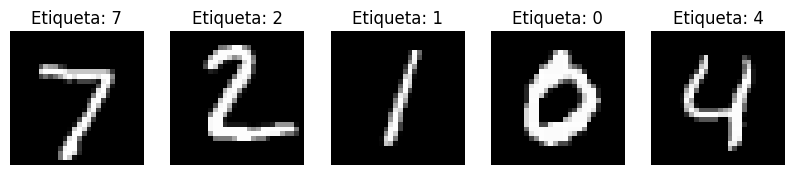

In [ ]:
#Cargar imágenes y etiquetas
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#Mostrar algunas imágenes
num_images_to_display = 5
plt.figure(figsize=(10, 2))
for i in range(num_images_to_display):
    ax = plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Etiqueta: {test_labels[i]}')
    plt.axis('off')
plt.show()

In [ ]:
#Cambiar forma
    #nº ejemplos, anchura, altura, nº de canales (Escala de grises: 1, RGB: 3)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

#Normalizar píxeles
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

#Cambiar etiquetas (Array de enteros según índice -> Matriz de características)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
#Poner en orden aleatorio
train_indices = np.arange(train_images.shape[0])
np.random.shuffle(train_indices)
train_images = train_images[train_indices]
train_labels = train_labels[train_indices]

test_indices = np.arange(test_images.shape[0])
np.random.shuffle(test_indices)
test_images = test_images[test_indices]
test_labels = test_labels[test_indices]

In [ ]:
#Construir RNA
rna = models.Sequential()
rna.add(layers.Flatten(input_shape=(28, 28, 1))) #28x28, grayscale
rna.add(layers.Dense(128, activation='relu'))
rna.add(layers.Dense(10, activation='softmax'))

rna.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Entrenar RNA
        #epochs: nº de iteraciones, batch_size: nº de ejemplos procesados por cada iteración
rna.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

rna1 = rna

Epoch 1/5
938/938 [==============================] - 6s 6ms/step - loss: 0.2999 - accuracy: 0.9142 - val_loss: 0.1748 - val_accuracy: 0.9491
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1387 - accuracy: 0.9596 - val_loss: 0.1143 - val_accuracy: 0.9650
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0982 - accuracy: 0.9712 - val_loss: 0.0977 - val_accuracy: 0.9699
Epoch 4/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0756 - accuracy: 0.9777 - val_loss: 0.0855 - val_accuracy: 0.9715
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0589 - accuracy: 0.9827 - val_loss: 0.0796 - val_accuracy: 0.9748


In [ ]:
#Construir RNA
rna = models.Sequential()
rna.add(layers.Flatten(input_shape=(28, 28, 1))) #28x28, grayscale
rna.add(layers.Dense(16, activation='relu'))
rna.add(layers.Dense(16, activation='relu'))
rna.add(layers.Dense(16, activation='relu'))
rna.add(layers.Dense(10, activation='softmax'))

rna.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Entrenar RNA
        #epochs: nº de iteraciones, batch_size: nº de ejemplos procesados por cada iteración
rna.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

rna2 = rna

Epoch 1/5
938/938 [==============================] - 5s 4ms/step - loss: 0.5779 - accuracy: 0.8156 - val_loss: 0.2893 - val_accuracy: 0.9168
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.2593 - accuracy: 0.9249 - val_loss: 0.2266 - val_accuracy: 0.9326
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2126 - accuracy: 0.9383 - val_loss: 0.2100 - val_accuracy: 0.9369
Epoch 4/5
938/938 [==============================] - 2s 3ms/step - loss: 0.1891 - accuracy: 0.9443 - val_loss: 0.1916 - val_accuracy: 0.9420
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1721 - accuracy: 0.9493 - val_loss: 0.1866 - val_accuracy: 0.9448


In [ ]:
#Evaluar RNA
loss, accuracy = rna1.evaluate(test_images, test_labels)
print(f"Exactitud con RNA: {accuracy * 100:.2f}%")

#Evaluar RNA
loss, accuracy = rna2.evaluate(test_images, test_labels)
print(f"Exactitud con RNA: {accuracy * 100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.0796 - accuracy: 0.9748
Exactitud con RNA: 97.48%
313/313 [==============================] - 1s 2ms/step - loss: 0.1866 - accuracy: 0.9448
Exactitud con RNA: 94.48%


3. Hacer lo mismo con una red convolutiva (1 punto)

In [ ]:
#Construir CNN
cnn = models.Sequential()
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))

#Compilar modelo (igual que RNA)
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Entrenar modelo (igual que RNA)
cnn.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

cnn1 = cnn

Epoch 1/5
938/938 [==============================] - 25s 26ms/step - loss: 0.2353 - accuracy: 0.9322 - val_loss: 0.0976 - val_accuracy: 0.9709
Epoch 2/5
938/938 [==============================] - 24s 26ms/step - loss: 0.0806 - accuracy: 0.9762 - val_loss: 0.0694 - val_accuracy: 0.9775
Epoch 3/5
938/938 [==============================] - 24s 26ms/step - loss: 0.0578 - accuracy: 0.9826 - val_loss: 0.0521 - val_accuracy: 0.9818
Epoch 4/5
938/938 [==============================] - 23s 24ms/step - loss: 0.0444 - accuracy: 0.9866 - val_loss: 0.0554 - val_accuracy: 0.9808
Epoch 5/5
938/938 [==============================] - 24s 26ms/step - loss: 0.0363 - accuracy: 0.9890 - val_loss: 0.0577 - val_accuracy: 0.9809


In [ ]:
#Construir CNN
cnn = models.Sequential()
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))

#Compilar modelo (igual que RNA)
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Entrenar modelo (igual que RNA)
cnn.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

cnn2 = cnn

Epoch 1/5
938/938 [==============================] - 25s 26ms/step - loss: 0.2348 - accuracy: 0.9325 - val_loss: 0.0865 - val_accuracy: 0.9740
Epoch 2/5
938/938 [==============================] - 24s 25ms/step - loss: 0.0756 - accuracy: 0.9785 - val_loss: 0.0639 - val_accuracy: 0.9802
Epoch 3/5
938/938 [==============================] - 25s 27ms/step - loss: 0.0540 - accuracy: 0.9840 - val_loss: 0.0502 - val_accuracy: 0.9836
Epoch 4/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0418 - accuracy: 0.9875 - val_loss: 0.0462 - val_accuracy: 0.9854
Epoch 5/5
938/938 [==============================] - 24s 25ms/step - loss: 0.0323 - accuracy: 0.9905 - val_loss: 0.0488 - val_accuracy: 0.9837


In [ ]:
#Construir CNN
cnn = models.Sequential()
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(64, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))

#Compilar modelo (igual que RNA)
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Entrenar modelo (igual que RNA)
cnn.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

cnn3 = cnn

Epoch 1/5
938/938 [==============================] - 51s 53ms/step - loss: 0.1842 - accuracy: 0.9437 - val_loss: 0.0557 - val_accuracy: 0.9811
Epoch 2/5
938/938 [==============================] - 57s 60ms/step - loss: 0.0517 - accuracy: 0.9841 - val_loss: 0.0430 - val_accuracy: 0.9853
Epoch 3/5
938/938 [==============================] - 56s 59ms/step - loss: 0.0364 - accuracy: 0.9886 - val_loss: 0.0415 - val_accuracy: 0.9856
Epoch 4/5
938/938 [==============================] - 55s 59ms/step - loss: 0.0291 - accuracy: 0.9909 - val_loss: 0.0316 - val_accuracy: 0.9892
Epoch 5/5
938/938 [==============================] - 52s 55ms/step - loss: 0.0234 - accuracy: 0.9924 - val_loss: 0.0296 - val_accuracy: 0.9899


In [ ]:
#Evaluar CNN
loss, accuracy = cnn1.evaluate(test_images, test_labels)
print(f"Exactitud con CNN: {accuracy * 100:.2f}%")

#Evaluar CNN
loss, accuracy = cnn2.evaluate(test_images, test_labels)
print(f"Exactitud con CNN: {accuracy * 100:.2f}%")

#Evaluar CNN
loss, accuracy = cnn3.evaluate(test_images, test_labels)
print(f"Exactitud con CNN: {accuracy * 100:.2f}%")

313/313 [==============================] - 2s 5ms/step - loss: 0.0577 - accuracy: 0.9809
Exactitud con CNN: 98.09%
313/313 [==============================] - 2s 5ms/step - loss: 0.0488 - accuracy: 0.9837
Exactitud con CNN: 98.37%
313/313 [==============================] - 4s 11ms/step - loss: 0.0296 - accuracy: 0.9899
Exactitud con CNN: 98.99%


4. Evaluar la capacidad de entrenamiento y test de la red convolutiva (1 punto)

313/313 [==============================] - 2s 5ms/step


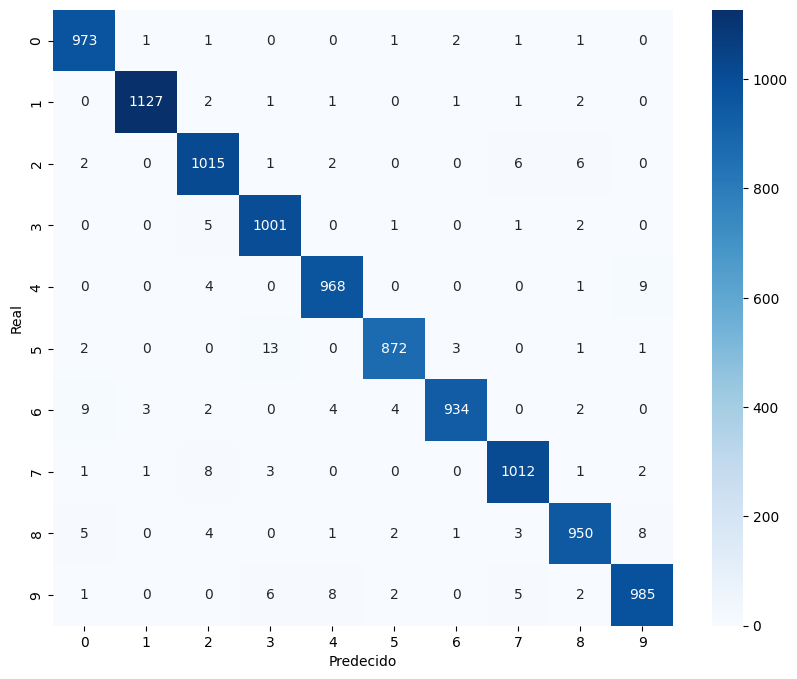

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

predictions = cnn.predict(test_images)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(test_labels, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0','1','2','3','4','5','6','7','8','9'], yticklabels=['0','1','2','3','4','5','6','7','8','9'])
plt.xlabel('Predecido')
plt.ylabel('Real')
plt.show()


Si evaluamos los modelos calculados anteriormente, podemos observar que cuanto más complejo es la arquitectura del modelo, existe una precisión mayor, una función de perdida menor y el tiempo en que tarda en desarrollarse el modelo en cuestion será mayor. Por lo tanto, podemos observar que si la red convolutiva es bastante compleja nos dará una precisión mayor, pero esto hará que el modelo sea más lento. En nuestro caso, como nos importa más que sea preciso y el tiempo no es excesivo para que nos bloqueé, nos parece un buen modelo.

Por otro lado, si vemos la matriz de confusión, vemos que se genera una diagonal de colores muy oscuros comparados con los demás cuadrados blancos. Esto es positivo porque nos indica que esta siendo bastante preciso. Podemos observar que puede encontrar problemas con números parecidos como pueden ser 0 y 6, 7 y 2 o 5 y 3.



5. Explicar posibles mejoras (1 punto)

Una posible mejora para intentar ayudar al modelo detectar de una manera más correcta los números en cuestión, sería poner más ejemplos de entrenamiento para los números que tenga más problemas de detectar (por ejemplo más 0 y 6), y decrementar aquellos en los que el modelo tenga menos problemas (por ejemplo el 1).

Otra posible mejora pensada puede ser que se añadan imagenes rotadas, movidas, o incluso con imagenes con ruido, para poder hacer que el modelo no se sobreajuste y tenga bastante mas flexibilidad.

Reducir el tiempo de ejecución, sería bastante importante, por lo que quedarnos con el primer modelo de red convolucional no sería tan mala idea ya que la precisión, aunque sea menor, es bastante parecida y el tiempo de ejecucion es la mitad comparado con la más compleja.

